In [1]:
#Importando as bibliotecas necess√°rias para explorar os dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Lendo as 3 partes do dataset de S√£o Paulo, considerando o separador como ponto e v√≠rgula, avisando e pulando as linhas que possuem problemas "on bad lines"
dfSP1 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP1.csv', sep=';', on_bad_lines='warn')
dfSP2 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP2.csv', sep=';', on_bad_lines='warn')
dfSP3 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP3.csv', sep=';', on_bad_lines='warn')

/tmp/ipykernel_18/2570457407.py:2: ParserWarning: Skipping line 3394310: expected 64 fields, saw 65

  dfSP1 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP1.csv', sep=';', on_bad_lines='warn')
/tmp/ipykernel_18/2570457407.py:2: DtypeWarning: Columns (4,12,21,23,36,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSP1 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP1.csv', sep=';', on_bad_lines='warn')
/tmp/ipykernel_18/2570457407.py:3: DtypeWarning: Columns (12,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSP2 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP2.csv', sep=';', on_bad_lines='warn')
/tmp/ipykernel_18/2570457407.py:4: DtypeWarning: Columns (12,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSP3 = pd.read_csv('/kaggle/input/sus-sndrome-gripal-2023/SP3.csv', sep=';', on_bad_lines='warn')


In [3]:
#Combinando todos os dataframes em um s√≥
dfSP = pd.concat([dfSP1, dfSP2, dfSP3], ignore_index=True)
dfSP.head()

sintomas profissionalSaude   racaCor  \
0  Tosse, Febre, Dor de Garganta, Coriza               N√£o     Preta   
1                          Assintom√°tico               N√£o  Ignorado   
2         Tosse, Dor de Garganta, Outros               N√£o    Branca   
3           Coriza, Dor de Cabe√ßa, Tosse               N√£o     Parda   
4           Dor de Cabe√ßa, Febre, Outros               N√£o    Branca   

                    outrosSintomas outrasCondicoes profissionalSeguranca  cbo  \
0                              NaN             NaN                   N√£o  NaN   
1                              NaN             NaN                   N√£o  NaN   
2                          MIALGIA             NaN                   N√£o  NaN   
3                              NaN             NaN                   N√£o  NaN   
4  DOR NO CORPO, APETITE DIMINUIDO             NaN                   N√£o  NaN   

  condicoes       sexo     estado  ... codigoResultadoTeste3  \
0       NaN   Feminino  S√£o Paulo  ...                   NaN   
1       NaN   Feminino  S√£o Paulo  ...                   NaN   
2       NaN   Feminino  S√£o Paulo  ...                   NaN   
3       NaN  Masculino  S√£o Paulo  ...                   NaN   
4       NaN  Masculino  S√£o Paulo  ...                   NaN   

  codigoEstadoTeste4 codigoTipoTeste4 codigoFabricanteTeste4  \
0                NaN              NaN                    NaN   
1                NaN              NaN                    NaN   
2                NaN              NaN                    NaN   
3                NaN              NaN                    NaN   
4                NaN              NaN                    NaN   

  codigoResultadoTeste4 dataColetaTeste1  dataColetaTeste2 dataColetaTeste3  \
0                   NaN       2023-11-16               NaN              NaN   
1                   NaN       2023-10-11               NaN              NaN   
2                   NaN       2023-03-17               NaN              NaN   
3                   NaN       2023-10-11               NaN              NaN   
4                   NaN       2023-12-06               NaN              NaN   

  dataColetaTeste4  idade  
0              NaN    NaN  
1              NaN    7.0  
2              NaN    8.0  
3              NaN   37.0  
4              NaN   25.0  

[5 rows x 64 columns]

In [4]:
#Exibindo as colunas do dataframe para entender todas as vari√°veis
dfSP.columns

Index(['sintomas', 'profissionalSaude', 'racaCor', 'outrosSintomas',
       'outrasCondicoes', 'profissionalSeguranca', 'cbo', 'condicoes', 'sexo',
       'estado', 'estadoIBGE', 'municipio', 'municipioIBGE', 'origem',
       'estadoNotificacao', 'municipioNotificacao', 'municipioNotificacaoIBGE',
       'evolucaoCaso', 'classificacaoFinal', 'codigoEstrategiaCovid',
       'codigoBuscaAtivaAssintomatico', 'outroBuscaAtivaAssintomatico',
       'codigoTriagemPopulacaoEspecifica', 'outroTriagemPopulacaoEspecifica',
       'codigoLocalRealizacaoTestagem', 'outroLocalRealizacaoTestagem',
       'codigoRecebeuVacina', 'codigoLaboratorioPrimeiraDose',
       'codigoLaboratorioSegundaDose', 'lotePrimeiraDose', 'loteSegundaDose',
       'codigoContemComunidadeTradicional', 'source_id', 'excluido',
       'validado', 'codigoDosesVacina', 'estadoNotificacaoIBGE',
       'totalTestesRealizados', 'dataNotificacao', 'dataInicioSintomas',
       'dataEncerramento', 'dataPrimeiraDose', 'dataSegundaDo

In [5]:
#Buscando poss√≠veis t√≥picos para explorar os dados

#Verificando se h√° registros de comunidades tradicionais dentro do estado de S√£o Paulo
pacientesComunidades = dfSP[dfSP['codigoContemComunidadeTradicional']==1]['sintomas'].count()
pacientesOutros = dfSP[dfSP['codigoContemComunidadeTradicional']==2]['sintomas'].count()

print('Pacientes de comunidades tradicionais:', pacientesComunidades)
print('Outros pacientes:', pacientesOutros)
print('Percentual em rela√ß√£o ao total:', pacientesComunidades / pacientesOutros * 100, '%')

Pacientes de comunidades tradicionais: 6070
Outros pacientes: 5366497
Percentual em rela√ß√£o ao total: 0.11310916599785671 %


In [6]:
#Locais de realiza√ß√£o da testagem
#1 - Servi√ßo de sa√∫de (UBS, hosp√≠tal, UPA, etc)
#2 - Local de trabalho
#3 - Aeroporto
#4 - Farm√°cia ou drogaria
#5 - Escola
#6 - Domic√≠lio ou comunidade
#7 - Outro
dfSP.groupby(['codigoLocalRealizacaoTestagem'])['sintomas'].count().sort_values(ascending=False)

codigoLocalRealizacaoTestagem
1.0    4767567
4.0     261844
3.0      83909
7.0      80616
2.0      21527
6.0       4526
5.0        765
Name: sintomas, dtype: int64

In [7]:
#Tipos de estrat√©gia de testagem de Covid
#1 - Diagn√≥stico assistencial (sintom√°tico)
#2 - Busca ativa de assintom√°tico
#3 - Triagem de popula√ß√£o espec√≠fica
estrategias = dfSP.groupby(['codigoEstrategiaCovid'])['sintomas'].count().sort_values(ascending=False)
print (estrategias)

codigoEstrategiaCovid
1.0    4999055
2.0     195200
3.0      26496
Name: sintomas, dtype: int64


In [8]:
#Percentual de estrat√©gia de busca ativa de assintom√°ticos em rela√ß√£o ao total
print(estrategias[2]/estrategias.sum() * 100, '%')

3.738925683297288 %


In [9]:
#Elencando o n√∫mero de pessoas que receberam vacina ou n√£o
#Segundo documenta√ß√£o:
#1 - Sim
#2 - N√£o 
#3 - Ignorado
vacinados = dfSP.groupby(['codigoRecebeuVacina'])['sintomas'].count().sort_values(ascending=False)
print(vacinados)

codigoRecebeuVacina
1.0    3443838
2.0     505191
3.0       3574
Name: sintomas, dtype: int64


In [10]:
#Percentual de pessoas que relataram s√≠ndrome gripal mas que n√£o se vacinaram
#(Desconsiderando as pessoas que n√£o confirmaram)
print(vacinados[2]/(vacinados[1] + vacinados[2]) * 100, '%')

12.792790328964413 %


In [11]:
#Talvez montar um gr√°fico exibindo quais s√£o os sintomas mais comuns
#(e a quantidade deles) quando a pessoa se vacinou e quando a pessoa n√£o
#se vacinou. Tentar tra√ßar um paralelo tamb√©m com a quantidade de vacinas
#Talvez ter uma evid√™ncia de que quanto mais vacinado, melhor

In [12]:
#Status de evolu√ß√£o da doen√ßa, agrupados
evolucao = dfSP.groupby(['evolucaoCaso'])['sintomas'].count()
print(evolucao.sort_values(ascending=False))

evolucaoCaso
Cura                        2856972
Ignorado                     334756
Em tratamento domiciliar      81312
Cancelado                     73683
Internado                      3253
√ìbito                          2004
Internado em UTI                252
Name: sintomas, dtype: int64


In [13]:
#N√∫mero de pessoas que morreram e que n√£o se vacinaram
dfObitos = dfSP[dfSP['evolucaoCaso'] == '√ìbito']
total = dfObitos[dfObitos['codigoRecebeuVacina']==1]['sintomas'].count() + dfObitos[dfObitos['codigoRecebeuVacina']==2]['sintomas'].count()
naoVacinados = dfObitos[dfObitos['codigoRecebeuVacina'] == 2]['sintomas'].count()
print(naoVacinados / total * 100, '%')

11.448598130841122 %


In [14]:
#Agrupando todos os sintomas para contar quais sintomas s√£o mais comuns
sintomas = dfSP['sintomas'].str.split(',').explode()

print(sintomas.value_counts().sort_values(ascending=False))

sintomas
 Tosse                    1872613
Coriza                    1766816
 Dor de Garganta          1566829
 Febre                    1284601
 Dor de Cabe√ßa            1221336
Tosse                     1004050
Assintom√°tico              933457
 Outros                    858652
Dor de Cabe√ßa              780421
 Coriza                    461260
 Dispneia                  394179
Febre                      332897
Dor de Garganta            313927
Outros                     191605
 Dist√∫rbios Gustativos     147896
 Dist√∫rbios Olfativos      107780
Dispneia                    88936
Dist√∫rbios Olfativos        55510
Dist√∫rbios Gustativos       44166
 Assintom√°tico               2063
 Dispineia                      1
Name: count, dtype: int64


In [15]:
#Sa√≠ram resultados com contagens diferentes por conta de espa√ßos em branco
#Limpando as strings que possuem espa√ßo em branco
sintomas = sintomas.str.lstrip()

#Teve um √∫nico resultado "Dispineia", que foi escrito incorretamente
#Transferindo para o termo correto
sintomas[sintomas == "Dispineia"] = "Dispneia"

print(sintomas.value_counts().sort_values(ascending=False))

sintomas
Tosse                    2876663
Coriza                   2228076
Dor de Cabe√ßa            2001757
Dor de Garganta          1880756
Febre                    1617498
Outros                   1050257
Assintom√°tico             935520
Dispneia                  483116
Dist√∫rbios Gustativos     192062
Dist√∫rbios Olfativos      163290
Name: count, dtype: int64


In [16]:
#Criando um dataframe com base na contagem dos sintomas
dfSintomas = pd.DataFrame(sintomas.value_counts(), columns=['count'])

dfSintomas.reset_index(inplace=True)
dfSintomas.columns = ['Sintomas', 'Ocorrencias']

dfSintomas.head()

Sintomas  Ocorrencias
0            Tosse      2876663
1           Coriza      2228076
2    Dor de Cabe√ßa      2001757
3  Dor de Garganta      1880756
4            Febre      1617498

<Axes: xlabel='Sintomas', ylabel='Ocorrencias'>

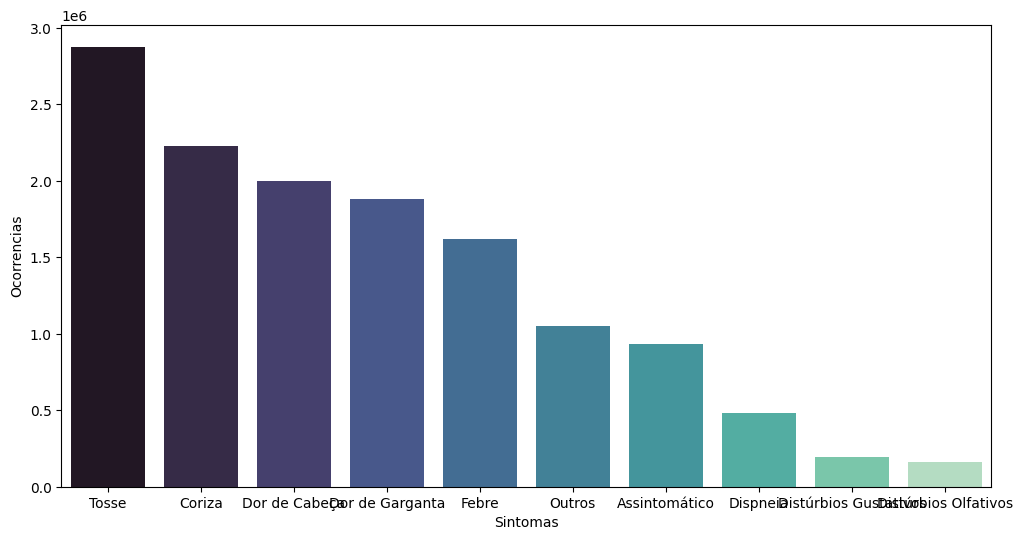

In [17]:
#Exibir gr√°fico usando o Seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=dfSintomas, x='Sintomas', y='Ocorrencias', palette='mako')

Text(0, 0.5, 'Total de ocorr√™ncias')

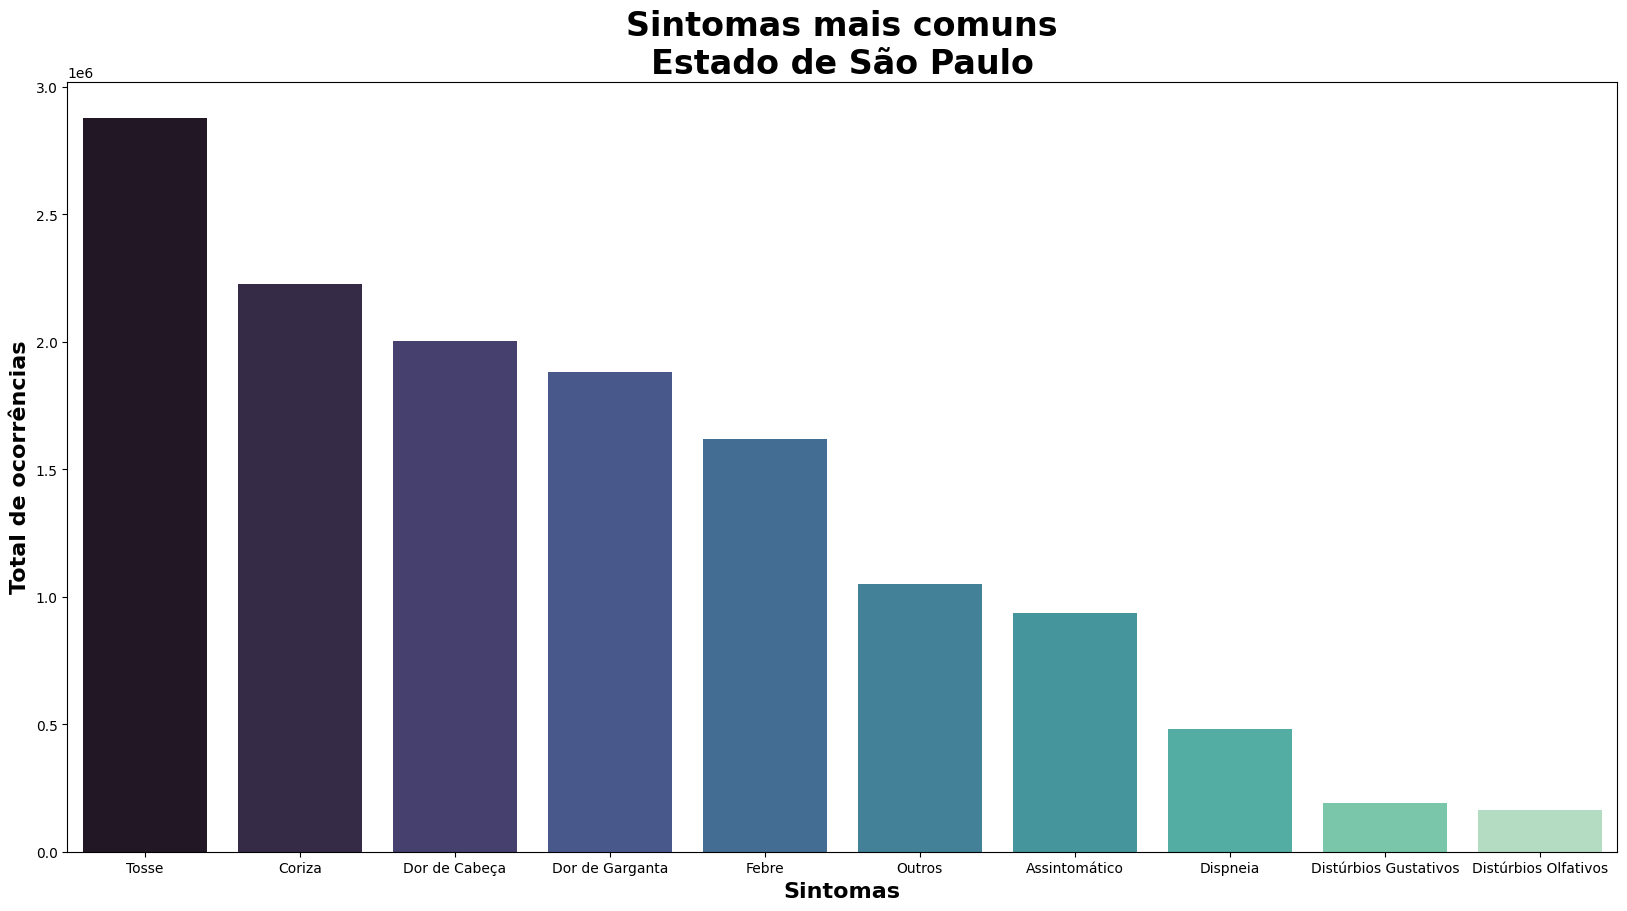

In [18]:
#D√° para aplicar alguns ajustes (tamanho do gr√°fico, t√≠tulos, etc...)
plt.figure(figsize=(20,10))
sns.barplot(data=dfSintomas, x='Sintomas', y='Ocorrencias', palette='mako')

plt.title('Sintomas mais comuns\nEstado de S√£o Paulo', fontsize=24, fontweight='bold')
plt.xlabel('Sintomas', fontsize=16, fontweight='bold')
plt.ylabel('Total de ocorr√™ncias', fontsize=16, fontweight='bold')

In [19]:
#Se for parar para ver, n√£o faz sentido ter "Assintom√°tico", j√° que quero
#ter uma lista dos sintomas mais comuns

#Deletando tabela de "Assintom√°ticos"
dfSintomas = dfSintomas.drop(dfSintomas[dfSintomas['Sintomas']=='Assintom√°tico'].index)
dfSintomas.head(10)

Sintomas  Ocorrencias
0                  Tosse      2876663
1                 Coriza      2228076
2          Dor de Cabe√ßa      2001757
3        Dor de Garganta      1880756
4                  Febre      1617498
5                 Outros      1050257
7               Dispneia       483116
8  Dist√∫rbios Gustativos       192062
9   Dist√∫rbios Olfativos       163290

In [20]:
#Verificar a composi√ß√£o do grupo de "outros" sintomas no dataframe principal
dfSP[dfSP['outrosSintomas'].notna()].groupby(['outrosSintomas'])['sintomas'].count().sort_values(ascending=False).head(20)

outrosSintomas
MIALGIA             122380
DOR NO CORPO         84064
mialgia              29619
DIARREIA             24358
dor no corpo         21475
CANSA√áO               9907
FRAQUEZA              9147
CONGEST√ÉO NASAL       8882
DOR NAS COSTAS        8737
VOMITO                7829
ESPIRROS              7250
MAL ESTAR             7172
Mialgia               6630
SINTOMAS GRIPAIS      6376
diarreia              6289
CONGESTAO NASAL       6010
DOR NO PEITO          5811
DOR DE OUVIDO         5635
CALAFRIOS             5350
ASSINTOMATICO         5283
Name: sintomas, dtype: int64

In [21]:
#Copiando o dataframe dfSP para n√£o poluir o original
dfSPoutros = dfSP.copy()

In [22]:
#Mialgia, dor no corpo e etc... s√£o a mesma coisa
#Existem v√°rios itens parecidos, como diarr√©ia, fraqueza/fadiga,
#congest√£o nasal (√© coriza).

#Setando todos esses para o mesmo valor comum

#Mialgia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin([
    'dor no corpo',
    'mialgia',
    'dor nas costas',
    'dor no peito',
    'dor abdominal',
    'dor de ouvido',
    'dores no corpo',
    'dor corpo',
    'dorsalgia',
    'dor nos olhos',
    'dor toracica',
    'dor no corpo.',
    'otalgia',
    'mialgia.',
    'dor lombar',
    'dor muscular',
    'dor no ouvido',
    'dor na face']), 'outrosSintomas'] = 'Mialgia'

#Diarr√©ia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['diarreia', 'diarr√©ia']), 'outrosSintomas'] = 'Diarr√©ia'

#Fadiga
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['cansa√ßo', 'fraqueza', 'mal estar', 'fadiga']), 'outrosSintomas'] = 'Fadiga'

#Coriza
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['congest√£o nasal', 'congestao nasal', 'coriza', 'obstru√ß√£o nasal']), 'outrosSintomas'] = 'Coriza'

#V√¥mito
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['vomito', 'v√¥mito', 'vomitos', 'v√¥mitos']), 'outrosSintomas'] = 'V√¥mito'

#N√°usea
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['nausea', 'n√°usea', 'nauseas', 'n√°useas']), 'outrosSintomas'] = 'N√°usea'

#Tontura
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['tontura', 'tonturas']), 'outrosSintomas'] = 'Tontura'

#Dor de cabe√ßa
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower() == 'cefaleia', 'outrosSintomas'] = 'Dor de cabe√ßa'

#Dispneia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower() == 'falta de ar', 'outrosSintomas'] = 'Dispneia'

#Calafrios
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['calafrios', 'calafrio']), 'outrosSintomas'] = 'Coriza'

#Espirros
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['espirros', 'espirro', 'sintomas gripais', 'gripe', 'gripal', 'sindrome gripal']), 'outrosSintomas'] = 'Espirros'

#Odinofagia
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower() == 'odinofagia', 'outrosSintomas'] = 'Odinofagia'

#Assintom√°tico
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['assintomatico', 'assintom√°tico']), 'outrosSintomas'] = 'Assintom√°tico'

#Rouquid√£o
dfSPoutros.loc[dfSPoutros['outrosSintomas'].str.lower().isin(
    ['rouquid√£o', 'rouquidao']), 'outrosSintomas'] = 'Rouquid√£o'

dfSPoutros[dfSPoutros['outrosSintomas'].notna()].groupby(['outrosSintomas'])['sintomas'].count().sort_values(ascending=False).head(15)

outrosSintomas
Mialgia                           328655
Fadiga                             40457
Espirros                           37054
Diarr√©ia                           36383
Coriza                             35053
V√¥mito                             15388
Assintom√°tico                      10450
N√°usea                              7572
Dispneia                            6677
Dor de cabe√ßa                       5369
Tontura                             5276
Rouquid√£o                           4940
Odinofagia                          4090
Outros Sintomas n√£o informados      1881
PROTOCOLO INSTITUCIONAL             1566
Name: sintomas, dtype: int64

In [23]:
#Criando dataframe com base na soma de valores de outros sintomas
dfOutros = pd.DataFrame(dfSPoutros['outrosSintomas'].value_counts(), columns=['count'])

dfOutros.reset_index(inplace=True)
dfOutros.columns = ['Sintomas', 'Ocorrencias']

dfOutros.head(15)

Sintomas  Ocorrencias
0                          Mialgia       328655
1                           Fadiga        40457
2                         Espirros        37054
3                         Diarr√©ia        36383
4                           Coriza        35053
5                           V√¥mito        15388
6                    Assintom√°tico        10450
7                           N√°usea         7572
8                         Dispneia         6677
9                    Dor de cabe√ßa         5369
10                         Tontura         5276
11                       Rouquid√£o         4940
12                      Odinofagia         4090
13  Outros Sintomas n√£o informados         1881
14         PROTOCOLO INSTITUCIONAL         1566

In [24]:
#Ajustando o dataframe final com a contagem de valores
#Adicionando os dados de Mialgia, Fadiga, Espirros e Diarr√©ia como novos sintomas
dfSintomas = pd.concat([dfSintomas, dfOutros.iloc[:4]], ignore_index=True)

dfSintomas.head(15)

Sintomas  Ocorrencias
0                   Tosse      2876663
1                  Coriza      2228076
2           Dor de Cabe√ßa      2001757
3         Dor de Garganta      1880756
4                   Febre      1617498
5                  Outros      1050257
6                Dispneia       483116
7   Dist√∫rbios Gustativos       192062
8    Dist√∫rbios Olfativos       163290
9                 Mialgia       328655
10                 Fadiga        40457
11               Espirros        37054
12               Diarr√©ia        36383

In [25]:
#Contando o restante dos outros sintomas

coriza = dfSintomas[dfSintomas['Sintomas'] == 'Coriza']['Ocorrencias'].iloc[0]
maisCoriza = dfOutros[dfOutros['Sintomas'] == 'Coriza']['Ocorrencias'].iloc[0]

dorCabeca = dfSintomas[dfSintomas['Sintomas'] == 'Dor de Cabe√ßa']['Ocorrencias'].iloc[0]
maisDorCabeca = dfOutros[dfOutros['Sintomas'] == 'Dor de cabe√ßa']['Ocorrencias'].iloc[0]

dispneia = dfSintomas[dfSintomas['Sintomas'] == 'Dispneia']['Ocorrencias'].iloc[0]
maisDispneia = dfOutros[dfOutros['Sintomas'] == 'Dispneia']['Ocorrencias'].iloc[0]

assintomaticos = dfOutros[dfOutros['Sintomas'] == 'Assintom√°tico']['Ocorrencias'].iloc[0]

#Contando a quantidade de outros (estou contabilizando somente aqueles valores
#que foram marcados como 'Outros', mas que tamb√©m responderam alguma coisa)
outros = dfOutros.iloc[4:]['Ocorrencias'].sum()
#novoOutros = dfSintomas[dfSintomas['Sintomas'] == 'Outros']['Ocorrencias'].iloc[0]
novoOutros = outros - maisCoriza - maisDorCabeca - maisDispneia - assintomaticos

print('Coriza antes:', coriza,
      '\nCoriza depois:', coriza + maisCoriza,
      '\nDor de cabe√ßa antes:', dorCabeca,
      '\nDor de cabe√ßa depois:', dorCabeca + maisDorCabeca,
      '\nDispneia antes:', dispneia,
      '\nDispneia depois:', dispneia + maisDispneia,
      '\nAssintom√°ticos:', assintomaticos,
      '\nTotal de outros sintomas:', outros,
      '\nNovo total de outros sintomas:', novoOutros)


Coriza antes: 2228076 
Coriza depois: 2263129 
Dor de cabe√ßa antes: 2001757 
Dor de cabe√ßa depois: 2007126 
Dispneia antes: 483116 
Dispneia depois: 489793 
Assintom√°ticos: 10450 
Total de outros sintomas: 604091 
Novo total de outros sintomas: 546542


In [26]:
#Setando novos valores no dataframe final
dfSintomas.loc[dfSintomas['Sintomas'] == 'Outros', 'Ocorrencias'] = novoOutros
dfSintomas.loc[dfSintomas['Sintomas'] == 'Coriza', 'Ocorrencias'] = coriza + maisCoriza
dfSintomas.loc[dfSintomas['Sintomas'] == 'Dor de Cabe√ßa', 'Ocorrencias'] = dorCabeca + maisDorCabeca
dfSintomas.loc[dfSintomas['Sintomas'] == 'Dispneia', 'Ocorrencias'] = dispneia + maisDispneia

In [27]:
#Exibindo resultado final
dfSintomas.head(15)

Sintomas  Ocorrencias
0                   Tosse      2876663
1                  Coriza      2263129
2           Dor de Cabe√ßa      2007126
3         Dor de Garganta      1880756
4                   Febre      1617498
5                  Outros       546542
6                Dispneia       489793
7   Dist√∫rbios Gustativos       192062
8    Dist√∫rbios Olfativos       163290
9                 Mialgia       328655
10                 Fadiga        40457
11               Espirros        37054
12               Diarr√©ia        36383

In [28]:
#Organizando os valores de acordo com a quantidade de ocorr√™ncias
dfSintomas = dfSintomas.sort_values(by=['Ocorrencias'], ascending=False)
dfSintomas.head(15)

Sintomas  Ocorrencias
0                   Tosse      2876663
1                  Coriza      2263129
2           Dor de Cabe√ßa      2007126
3         Dor de Garganta      1880756
4                   Febre      1617498
5                  Outros       546542
6                Dispneia       489793
9                 Mialgia       328655
7   Dist√∫rbios Gustativos       192062
8    Dist√∫rbios Olfativos       163290
10                 Fadiga        40457
11               Espirros        37054
12               Diarr√©ia        36383

Text(0, 0.5, 'Total de ocorr√™ncias')

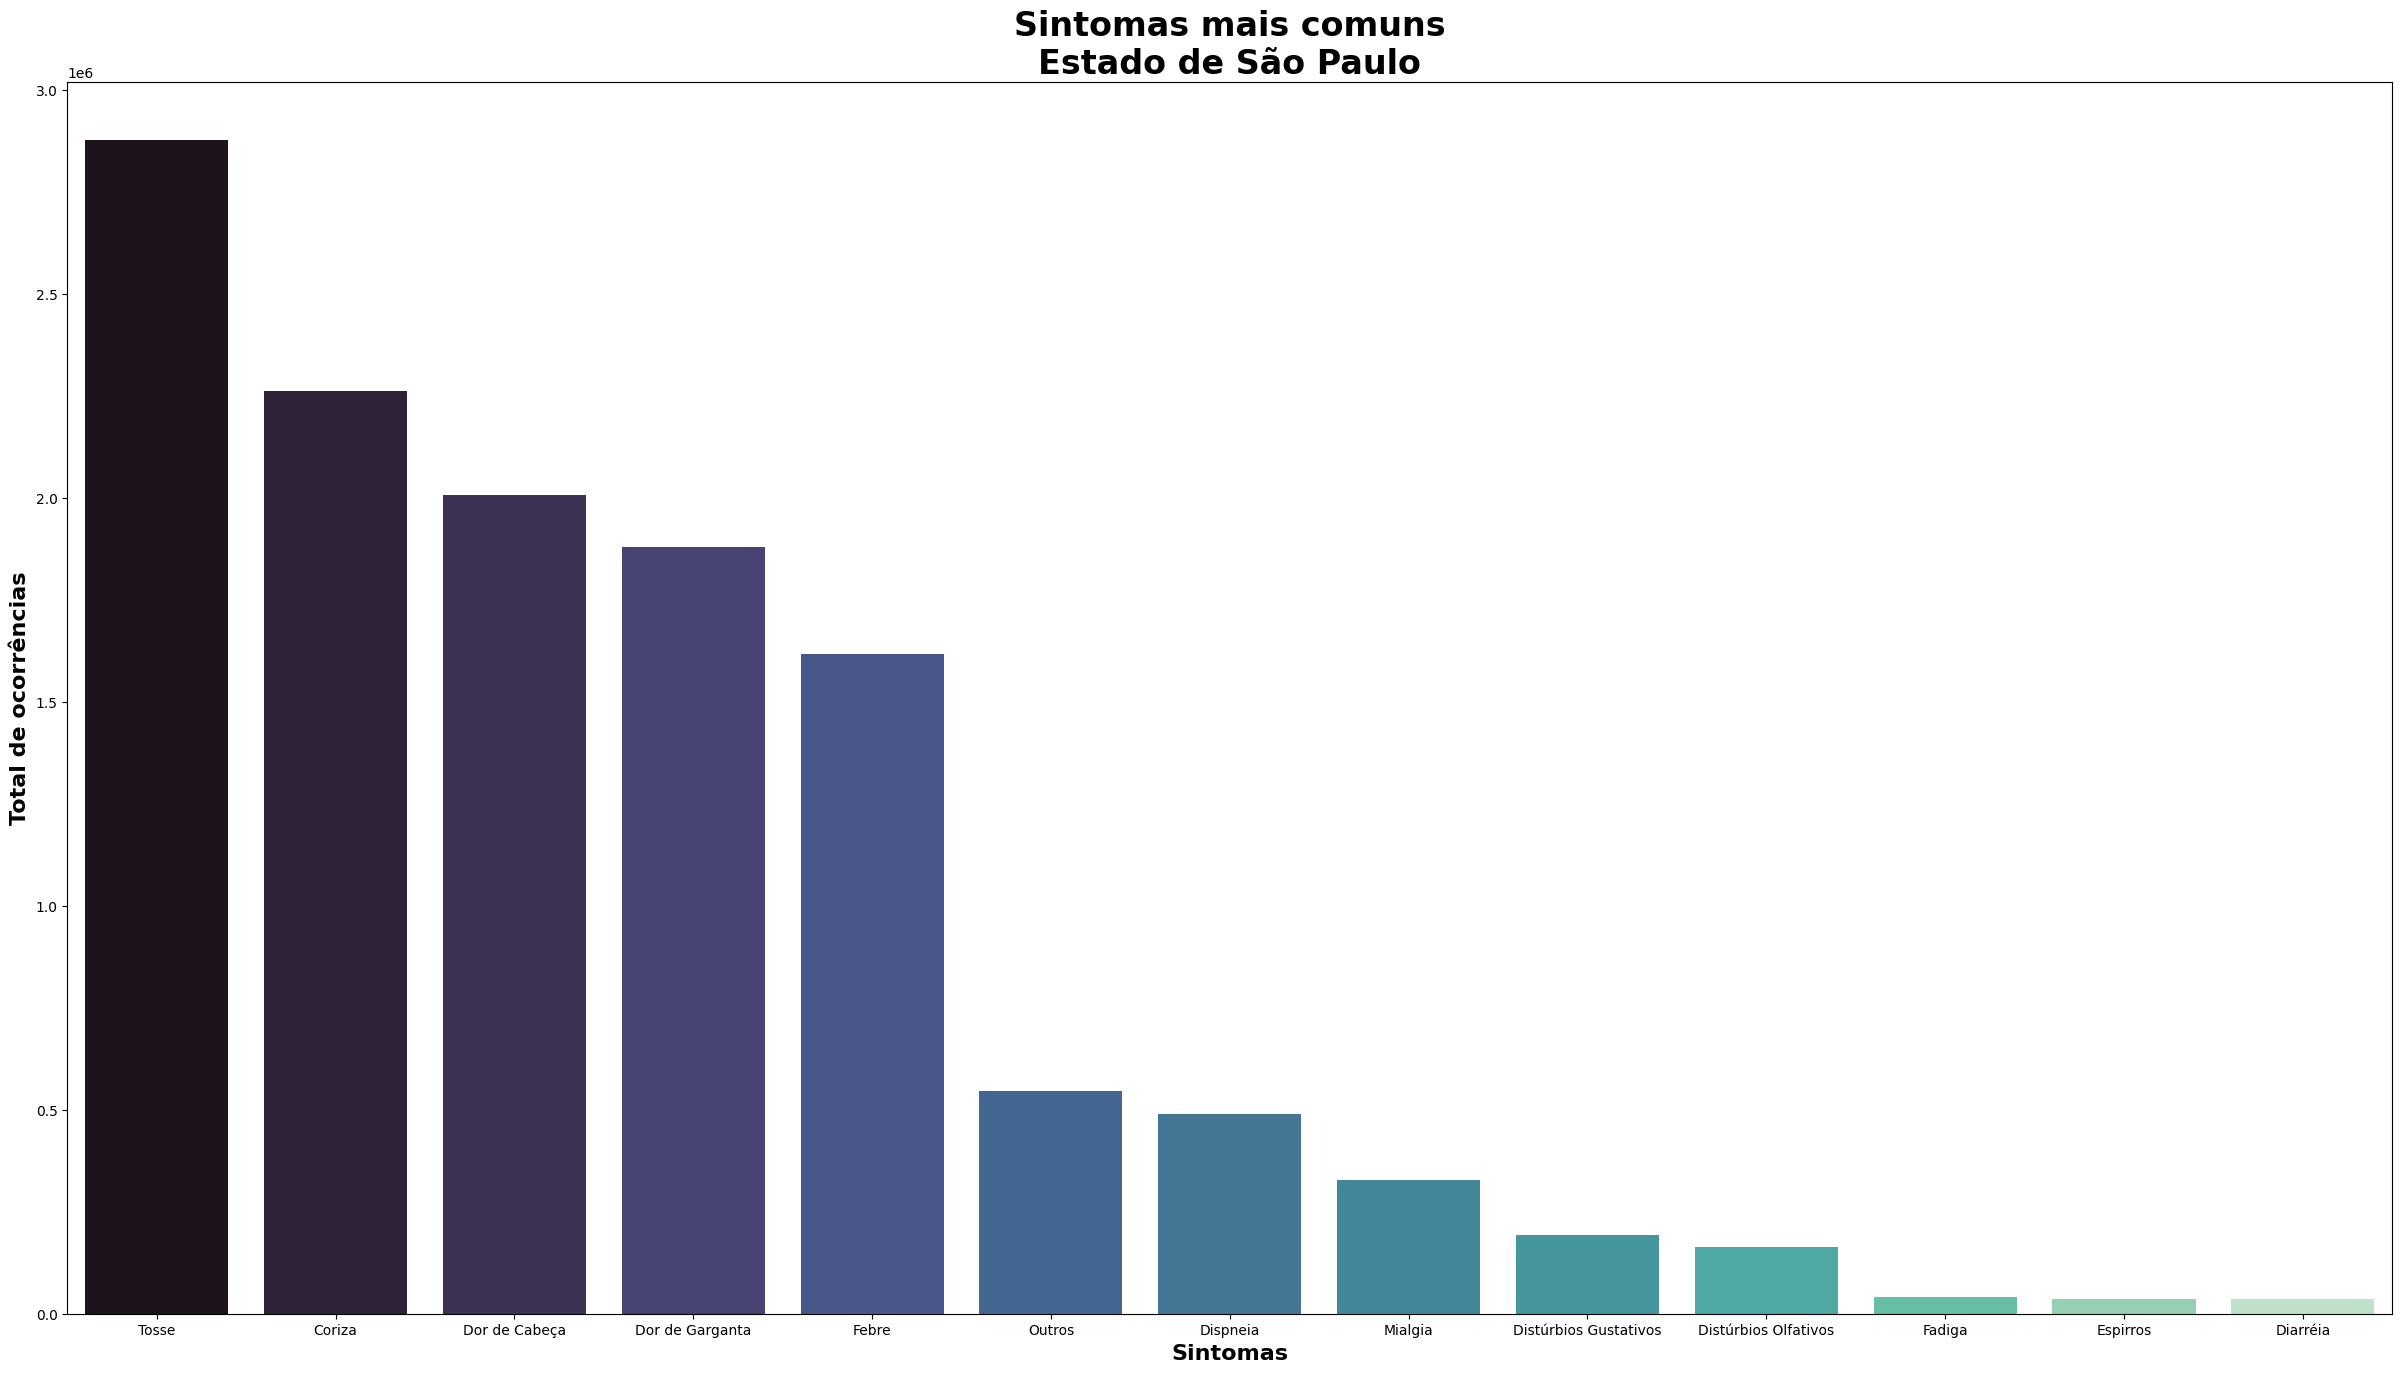

In [29]:
#Plotando o gr√°fico final
plt.figure(figsize=(30,16))
sns.barplot(data=dfSintomas, x='Sintomas', y='Ocorrencias', palette='mako')

plt.title('Sintomas mais comuns\nEstado de S√£o Paulo', fontsize=24, fontweight='bold')
plt.xlabel('Sintomas', fontsize=16, fontweight='bold')
plt.ylabel('Total de ocorr√™ncias', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Sintomas mais comuns\nEstado de S√£o Paulo')

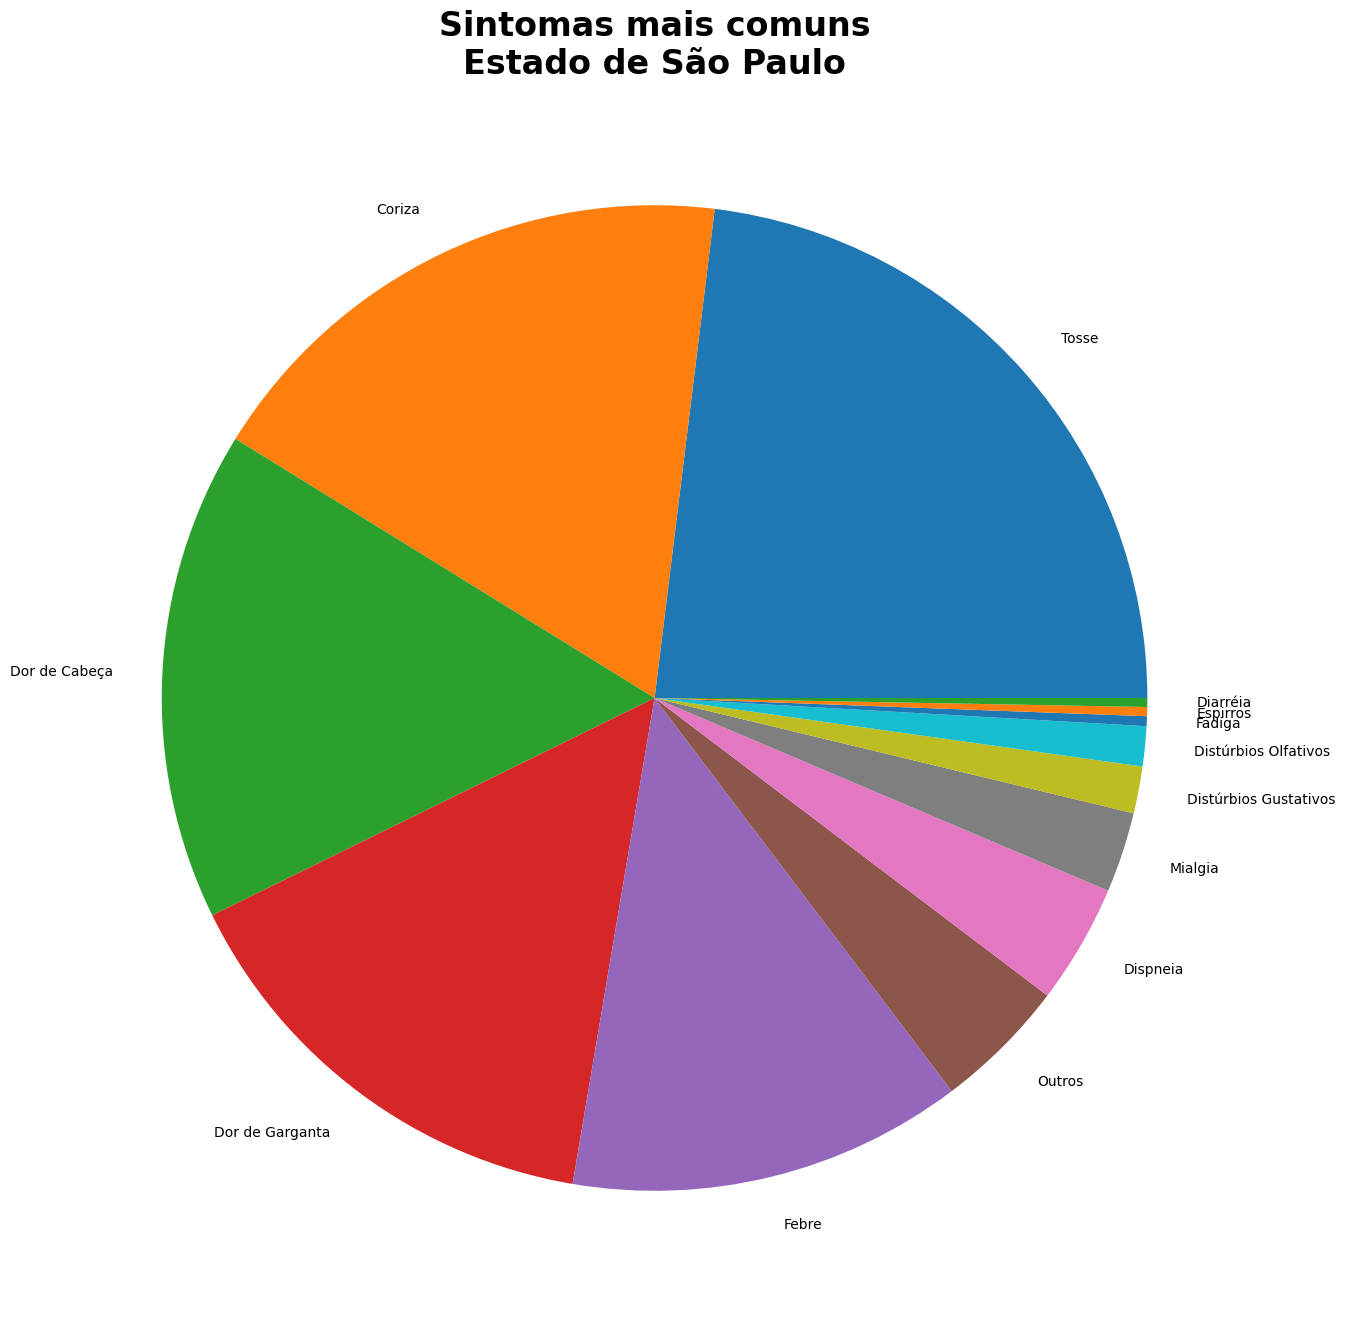

In [30]:
#Plotando um gr√°fico de pizza
plt.figure(figsize=(16,16))
plt.pie(dfSintomas['Ocorrencias'], labels=dfSintomas['Sintomas'])

plt.title('Sintomas mais comuns\nEstado de S√£o Paulo', fontsize=24, fontweight='bold')
#plt.xlabel('Sintomas', fontsize=16, fontweight='bold')
#plt.ylabel('Total de ocorr√™ncias', fontsize=16, fontweight='bold')

In [31]:
#Easter Egg
dfSP[dfSP['outrosSintomas'] == 'ü§£']

sintomas profissionalSaude racaCor outrosSintomas outrasCondicoes  \
4610654   Outros               N√£o  Branca              ü§£             NaN   

        profissionalSeguranca  cbo condicoes       sexo     estado  ...  \
4610654                   N√£o  NaN       NaN  Masculino  S√£o Paulo  ...   

        codigoResultadoTeste3 codigoEstadoTeste4 codigoTipoTeste4  \
4610654                   NaN                NaN              NaN   

        codigoFabricanteTeste4 codigoResultadoTeste4 dataColetaTeste1  \
4610654                    NaN                   NaN       2020-08-19   

         dataColetaTeste2 dataColetaTeste3 dataColetaTeste4  idade  
4610654               NaN              NaN              NaN   43.0  

[1 rows x 64 columns]